<a href="https://colab.research.google.com/github/KhanhChinh12/DataVisualization_TourDeFrance/blob/main/Tour_de_France_Statistics_Group7_N03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Giới thiệu tổng quan:

#### Tour de France là một trong những giải đua xe đạp danh giá và khắc nghiệt nhất thế giới với lịch sử đã tồn tại hơn một thế kỷ với nhiều thăng trầm và những thay đổi quan trọng.

#### Với việc phân tích và trực quan hóa dữ liệu của giải Tour de France để khám phá quá trình phát triển, mối liên hệ và những yếu tố ảnh hưởng đến thành tích thi đấu và sự tham gia của các vận động viên.

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium

## 1. Tìm hiểu dữ liệu

In [ ]:
path_url = 'https://raw.githubusercontent.com/KhanhChinh12/DataVisualization_TourDeFrance/main/tour_de_france.xlsx'

data = pd.read_excel(path_url)

data

,Year,Winner's avg speed,Total distance (km),Number of stages,Finishers,Entrants,Winner,Winner's Nationality,Winner's Team,Start Date,End Date,Starting city,Starting city Latitude,Starting city Longitude,Starting country,Finishing city,Finishing city Latitude,Finishing city Longitude
0,1903,25.680,2428.0,6,21,60,Maurice Garin,France,La Française,1903-07-01,1903-07-21,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
1,1904,25.270,2420.0,6,27,88,Henri Cornet,France,Cycles JC,1904-07-02,1904-07-24,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
2,1905,27.110,2994.0,11,24,60,Louis Trousselier,France,Cycles Peugeot,1905-07-09,1905-07-30,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
3,1906,24.460,4545.0,13,14,82,René Pottier,France,Cycles Peugeot,1906-07-04,1906-07-29,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
4,1907,28.470,4488.0,14,33,93,Lucien Petit-Breton,France,Cycles Peugeot,1907-07-08,1907-08-04,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2012,39.880,3496.9,20,153,198,Bradley Wiggins,United Kingdom,Team Sky,2012-06-30,2012-07-22,Liège,50.6326,5.5797,Belgium,Paris,48.8566,2.3522
99,2013,40.540,3403.5,21,169,198,Chris Froome,United Kingdom,Team Sky,2013-06-29,2013-07-21,Porto Vecchio,41.5914,9.2783,France,Paris,48.8566,2.3522
100,2014,40.690,3659.0,21,164,198,Vincenzo Nibali,Italy,Astana,2014-07-05,2014-07-27,Leeds,53.8578,-1.5023,United Kingdom,Paris,48.8566,2.3522
101,2015,39.640,3360.3,21,160,198,Chris Froome,United Kingdom,Team Sky,2015-07-04,2015-07-26,Utrecht,52.0907,5.1214,Netherlands,Paris,48.8566,2.3522


### Phân tích các trường dữ liệu:
Qua bảng dữ liệu thể hiện những thông tin liên quan theo từng năm từ 1903 đến 2016 của giải đua xe đạp nổi tiếng thế giới Tour de France. Trong đó, các cột:

- Year: Năm diễn ra sự kiện của giải đua Tour De France, bắt đầu từ năm 1903 đến năm 2016.
- Winner's avg speed: đây là tốc độ trung bình (km/h) của người chiến thắng trong cuộc đua.
- Total distance: Tổng quãng đường của chặng đua (km).
- Number of stages: Số chặng trong giải đua.
- Finishers: Số lượng tay đua hoàn thành giải.
- Entrants: Số lượng tay đua tham gia giải.
- Winner: Tên người thắng cuộc.
- Winner's Nationality: Quốc tịch của người chiến thắng giải đua.
- Winner's Team: Tên đội đua của người thắng cuộc đại diện.
- Start Date: Ngày bắt đầu của giải đua.
- End Date: Ngày kết thúc của giải đua.
- Starting City: Thành phố xuất phát của cuộc đua.
- Starting city Latitude: Vĩ độ của thành phố bắt đầu cuộc đua.
- Starting city Longitude: Kinh độ của thành phố bắt đầu cuộc đua.
- Starting country: Quốc gia bắt đầu giải đua Tour de France mỗi năm.
- Finishing City: Thành phố kết thúc cuộc đua.
- Finishing city Latitude: Vĩ độ của thành phố kết thúc cuộc đua.
- Finishing city Longitude: Kinh độ của thành phố kết thúc cuộc đua.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      103 non-null    int64         
 1   Winner's avg speed        103 non-null    float64       
 2   Total distance (km)       103 non-null    float64       
 3   Number of stages          103 non-null    int64         
 4   Finishers                 103 non-null    int64         
 5   Entrants                  103 non-null    int64         
 6   Winner                    103 non-null    object        
 7   Winner's Nationality      103 non-null    object        
 8   Winner's Team             103 non-null    object        
 9   Start Date                103 non-null    datetime64[ns]
 10  End Date                  103 non-null    datetime64[ns]
 11  Starting city             103 non-null    object        
 12  Starting city Latitude

Dữ liệu bao gồm có tổng cộng 18 cột và 103 hàng, trong đó toàn bộ các cột đều có đủ 103 thông tin giá trị.
Các thông tin về giá trị đa dạng kiểu dữ liệu gồm số nguyên, số thực, chuỗi và thời gian.

In [ ]:
# Các chỉ số thống kê cơ bản
data.describe()

,Year,Winner's avg speed,Total distance (km),Number of stages,Finishers,Entrants,Start Date,End Date,Starting city Latitude,Starting city Longitude,Finishing city Latitude,Finishing city Longitude
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103,103,103.000000,103.000000,1.030000e+02,1.030000e+02
mean,1962.291262,34.057243,4236.823301,20.097087,87.825243,141.631068,1962-10-14 20:16:18.640776704,1962-11-07 17:14:33.786407776,48.723115,2.529380,4.885660e+01,2.352200e+00
min,1903.000000,24.060000,2420.000000,6.000000,10.000000,60.000000,1903-07-01 00:00:00,1903-07-21 00:00:00,41.591400,-6.260300,4.885660e+01,2.352200e+00
25%,1932.500000,29.460000,3674.000000,20.000000,49.000000,117.500000,1932-12-31 00:00:00,1933-01-25 12:00:00,48.296450,1.100000,4.885660e+01,2.352200e+00
50%,1965.000000,35.420000,4177.000000,21.000000,82.000000,132.000000,1965-06-22 00:00:00,1965-07-14 00:00:00,48.856600,2.352200,4.885660e+01,2.352200e+00
75%,1990.500000,38.730000,4660.500000,22.000000,131.000000,180.000000,1991-01-01 12:00:00,1991-01-23 12:00:00,49.188800,4.461150,4.885660e+01,2.352200e+00
max,2016.000000,41.650000,5745.000000,25.000000,174.000000,210.000000,2016-07-02 00:00:00,2016-07-21 00:00:00,53.857800,13.405000,4.885660e+01,2.352200e+00
std,33.330676,5.190367,696.994425,3.516110,45.262075,40.308368,NaN,NaN,2.023238,3.263372,5.712138e-14,3.570086e-15


Từ các thống kê cơ bản của dữ liệu về giải đua xe đạp Tour de France, cho thấy:
- Tốc độ trung bình của người thắng là 34.06 km/h và quãng đường trung bình của giải khoảng 4236.82 km. Đồng thời, có trung bình 20.1 chặng đua.
- Trung bình có 87.83 người hoàn thành và 141.63 người tham gia mỗi giải đua.
- Số chặng đua thấp nhất là 6 và tổng quãng đường thấp nhất là 2420 km. Đồng thời, số lượng tay đua hoàn thành ít nhất là 10 và đăng ký tham gia ít nhất là 60 được ghi nhận trong lịch sử giải Tour de France.
- Số chặng đua nhiều nhất là 25 và tổng quãng đường dài nhất là 5745 km. Số lượng tay đua tham gia nhiều nhất là 210 người và cao nhất có đến 174 người hoàn thành giải đua.
- Về thành phố xuất phát có vĩ độ dao động từ 41.59 đến 53.86 và kinh độ trong khoảng -6.26 đến 13.40, giải đua diễn ra ở khu vực châu Âu.
- Tốc độ trung bình của người thắng nằm trong khoảng 29.46 đến 38.73 km/h và tổng quãng đường đua từ 3674 đến 4660 km.
- Phần lớn có từ 20 đến 22 chặng đua. Trong đó, số người hoàn thành dao động từ 49 đến 131 người và tay đua tham gia trong khoảng 117 đến 180 người.


## 2. Phân tích và trực quan hóa dữ liệu của Tour de France

### 2.1 Số lần tổ chức giải đua Tour de France theo năm

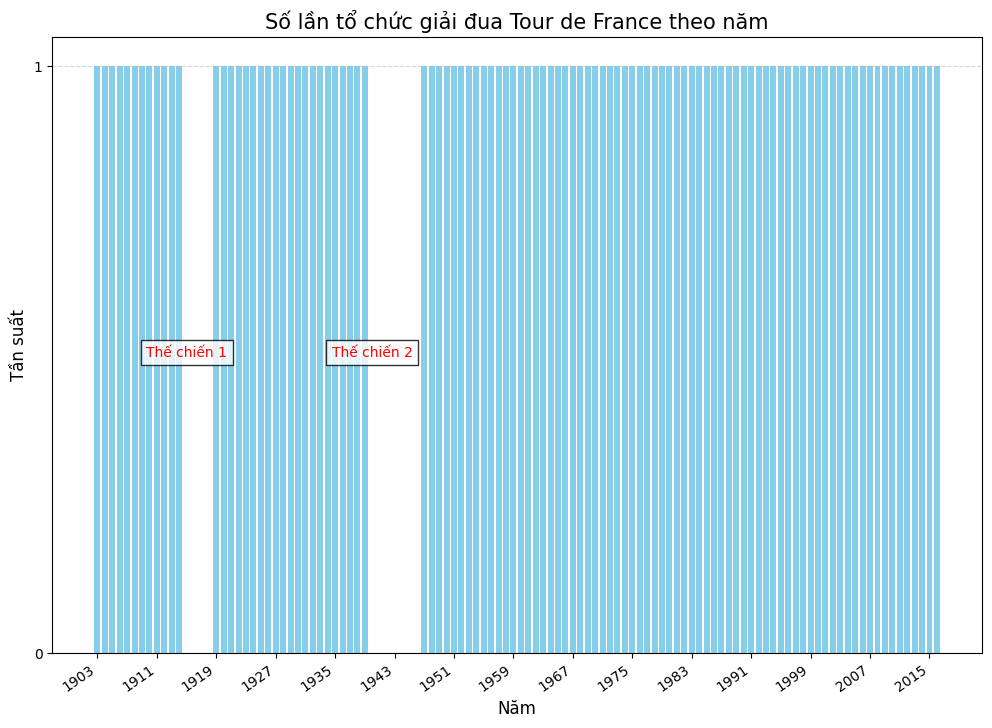

In [ ]:
year_counts = data['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))

plt.bar(year_counts.index, year_counts.values, color='skyblue')

plt.title('Số lần tổ chức giải đua Tour de France theo năm', fontsize=15)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

plt.xticks(np.arange(1903, 2017, 8), np.arange(1903, 2017, 8), rotation=35, ha='right')
plt.yticks([0, 1])

plt.text(1915, 0.5, 'Thế chiến 1', ha='center', va='bottom', color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(1940, 0.5, 'Thế chiến 2', ha='center', va='bottom', color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### Nhận xét:

- Giai đoạn 1903-1914: Giải đua được bắt đầu và tổ chức hàng năm sau đó, thể hiện sự phát triển bước đầu của giải.
- Giai đoạn 1915-1918: Thế chiến thứ nhất xảy ra, giải đua bị gián đoạn.
- Giai đoạn 1919-1939: Giải đua được tổ chức trở lại hằng năm sau chiến tranh, cho thấy sự phục hồi và phát triển của giải đua.
- Giai đoạn 1940-1946: Tiếp tục bị gián đoạn do chiến tranh thế giới thứ hai nổ ra.
- Giai đoạn 1947-2016: Giải đua được tổ chức lại sau chiến tranh và liên tục hằng năm, thể hiện tính bền vững và sức hút của sự kiện thể thao này.

##### Qua biểu đồ cho thấy giải đua Tour de France được tổ chức đều đặn hằng năm 1 lần gần như liên tục từ năm 1903 đến 2016. Tuy nhiên, trong lịch sử có 2 khoảng thời gian giải đua bị gián đoạn do xảy ra chiến tranh thế giới thứ nhất (1915 đến 1918) và thế chiến 2 (1940 đến 1946).

##### Giải đua xe đạp Tour de France là sự kiện thể thao đã có lịch sử lâu đời và trải qua nhiều biến động, khi bị ảnh hưởng bởi 2 cuộc chiến tranh thế giới khiến giải phải gián đoạn việc tổ chức.

##### Cùng với đó, Tour de France cũng đã vượt qua được những thử thách, khó khăn để tiếp tục duy trì và phát triển trở thành một trong những sự kiện thể thao quan trọng và nổi tiếng trên toàn thế giới.  


### 2.2 Tốc độ trung bình của người thắng qua các năm

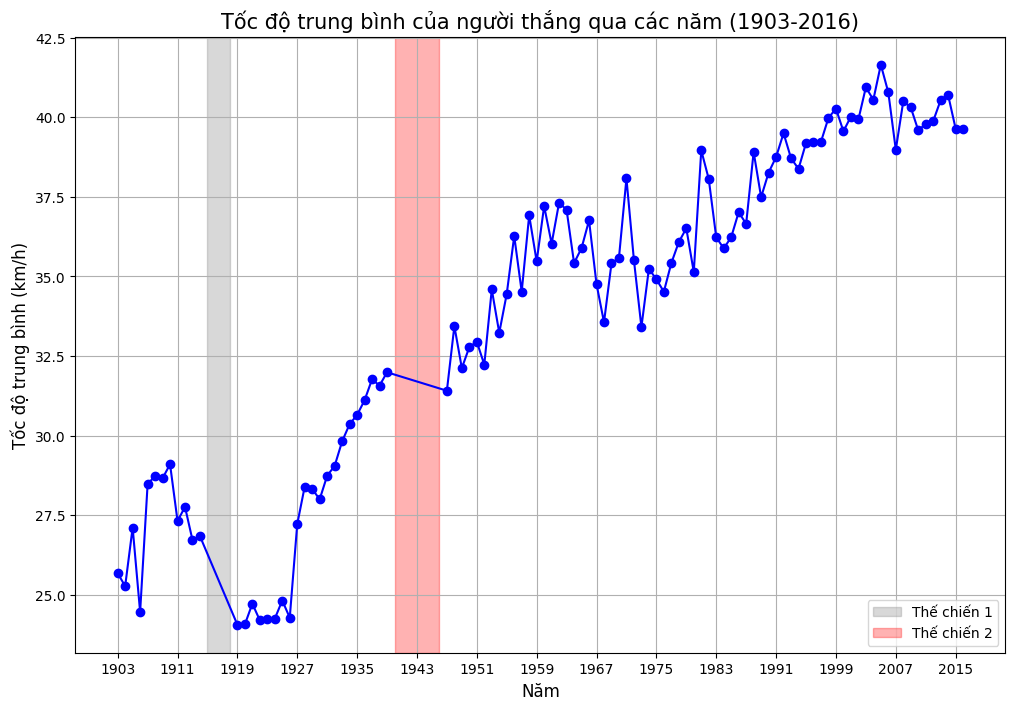

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(data['Year'], data['Winner\'s avg speed'], marker='o', linestyle='-', color='blue')

plt.title('Tốc độ trung bình của người thắng qua các năm (1903-2016)', fontsize=15)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tốc độ trung bình (km/h)', fontsize=12)

plt.xticks(np.arange(1903, 2017, 8), np.arange(1903, 2017, 8))
plt.grid(True)

plt.axvspan(1915, 1918, color='gray', alpha=0.3, label='Thế chiến 1')
plt.axvspan(1940, 1946, color='red', alpha=0.3, label='Thế chiến 2')

plt.legend()
plt.show()

#### Nhận xét:

##### Từ biểu đồ thấy rằng tốc độ trung bình của các tay đua thắng giải Tour de France có xu hướng tăng dần theo thời gian, ghi nhận khoảng 25 km/h vào đầu thế kỷ 20 cho đến 40 km/h trong những năm diễn ra gần đây. Các giai đoạn cụ thể:

- Giai đoạn 1903-1930: Đây là khoảng thời gian khởi đầu của giải đua với tốc độ trung bình trong giai đoạn này tương đối thấp, dao động quanh mức 25-30 km/h, có một số biến động nhỏ về tốc độ nhưng không có xu hướng tăng rõ rệt. Phản ánh điều kiện đường xá, xe đạp còn thô sơ và phương pháp huấn luyện chưa phát triển.

- Giai đoạn 1930-1950: Tốc độ trung bình tăng lên đáng kể, đạt mức trên 30 km/h vào những năm 1940. Có thể do sự xuất hiện của các cải tiến về xe đạp, chiến thuật thi đấu và phương pháp huấn luyện.

- Giai đoạn 1950-1990: Tốc độ trung bình tiếp tục tăng nhưng không đều đặn khi có những giai đoạn giảm tốc độ đáng kể. Đặc biệt trong những năm 1960 và 1980, chứng kiến tốc độ trung bình giảm đáng kể có thể liên quan đến các thay đổi về luật lệ, điều kiện đường đua hoặc các sự kiện đặc biệt khác.

- Giai đoạn 1990-2016: Tốc độ trung bình tăng lên mạnh mẽ, đạt mức trong khoảng 40 km/h vào những năm 2010, thể hiện sự phát triển vượt bậc của môn đua xe đạp. Đây có thể do sự phát triển vượt bậc của công nghệ tiên tiến, phương pháp huấn luyện khoa học, dinh dưỡng và sự chuyên nghiệp của những đội đua xe đạp.

##### Đồng thời, tốc độ trung bình không tăng một cách tuyến tính mà có nhiều biến động lên xuống. Cho thấy sự phức tạp của giải đua với nhiều yếu tố ảnh hưởng đến tốc độ như địa hình, thời tiết, chiến thuật thi đấu và sức khỏe của các vận động viên tham gia.

##### Ngoài ra, còn cho thấy sự gián đoạn của giải Tour de France trong 2 cuộc chiến tranh thế giới lần lượt vào các năm 1915-1918 và 1940-1946, với tốc độ trung bình giảm mạnh trong những năm này.

##### Qua đó, tốc độ trung bình của người thắng có xu hướng tăng dần theo từng năm và tăng mạnh nhất trong những năm gần đây, tuy nhiên có biến động nhỏ ở các giai đoạn xảy ra 2 cuộc chiến tranh thế giới hay một vài năm khác.

### 2.3 Tổng quãng đường của giải đấu qua các năm

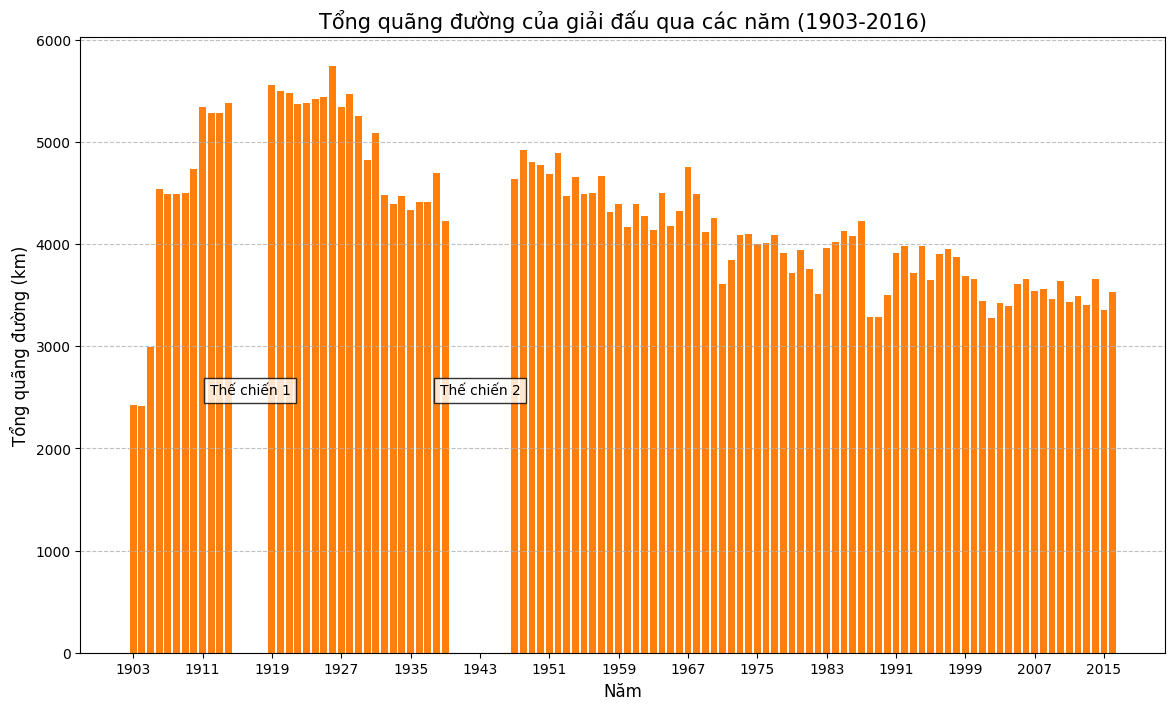

In [ ]:
plt.figure(figsize=(14, 8))

plt.bar(data['Year'], data['Total distance (km)'], color='tab:orange')

plt.title('Tổng quãng đường của giải đấu qua các năm (1903-2016)', fontsize=15)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tổng quãng đường (km)', fontsize=12)

plt.xticks(np.arange(1903, 2017, 8), np.arange(1903, 2017, 8))

plt.text(1916.5, 2500, 'Thế chiến 1', ha='center', va='bottom', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(1943, 2500, 'Thế chiến 2', ha='center', va='bottom', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.show()

#### Nhận xét:

##### Nhìn chung, tổng quãng đường của giải đua Tour de France từ năm 1903-2016 có xu hướng giảm dần theo thời gian. Cụ thể:

- Giai đoạn 1903-1930: Giải đua bắt đầu được tổ chức, tổng quãng đường có sự biến động lớn với một số năm có tổng chiều dài cuộc đua rất cao trên 5500 km và những năm khác lại có quãng đường thấp hơn khoảng 4500 km. Phản ánh sự thay đổi về cách tổ chức và thiết kế đường đua ở giai đoạn đầu của giải.

- Giai đoạn 1930-1950: Thấy rằng tổng quãng đường đua giảm xuống đáng kể, dao động quanh mức 4000-4500 km. Có thể liên quan đến các yếu tố như điều kiện kinh tế, xã hội và chính trị trong thời kỳ này.

- Giai đoạn 1950-1980: Tổng quãng đường tiếp tục giảm và ổn định ở mức khoảng 3500-4000 km.

- Giai đoạn 1980-2016: Nhận thấy tổng quãng đường có xu hướng tăng nhẹ trở lại, nhưng vẫn thấp hơn so với giai đoạn đầu của giải đua.

##### Trong lịch sử Tour de France, một số năm có tổng quãng đường đua nổi bật hơn so với xu hướng chung như năm 1927 ghi nhận tổng chiều dài cuộc đua cao nhất gần 6000 km và tổng quãng đường thấp nhất vào năm 1904 với 2420 km.

##### Tuy nhiên, có sự gián đoạn của giải đua trong 2 cuộc chiến tranh thế giới. Ở các năm diễn ra chiến tranh 1915-1918 và 1940-1946, Tour de France không được tổ chức nên không có dữ liệu về tổng quãng đường trong những năm này.

##### Từ đó, biểu đồ tổng quãng đường của giải Tour de France từ năm 1903-2016 cho thấy sự thay đổi đáng kể trong cách thức tổ chức và thiết kế đường đua. Khi tổng quãng đường có xu hướng giảm dần theo thời gian, với những giai đoạn biến động khác nhau. Chiến tranh và các yếu tố đặc biệt khác cũng ảnh hưởng đến tổng quãng đường đua của giải.



### 2.4 Số chặng đua của giải Tour de France qua các năm

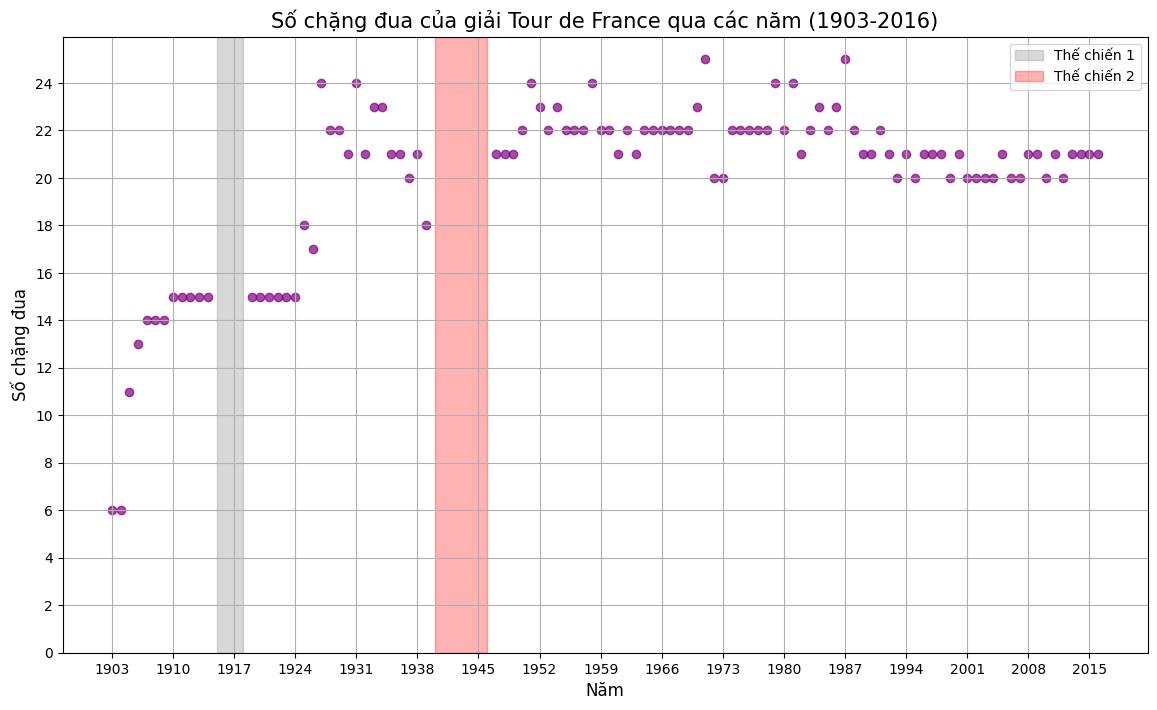

In [ ]:
plt.figure(figsize=(14, 8))

plt.scatter(data['Year'], data['Number of stages'], color = 'purple', alpha=0.7)

plt.title('Số chặng đua của giải Tour de France qua các năm (1903-2016)', fontsize=15)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số chặng đua', fontsize=12)

plt.xticks(np.arange(1903, 2017, 7), np.arange(1903, 2017, 7))
plt.yticks(np.arange(0, 26, 2))

plt.axvspan(1915, 1918, color='gray', alpha=0.3, label='Thế chiến 1')
plt.axvspan(1940, 1946, color='red', alpha=0.3, label='Thế chiến 2')

plt.legend()

plt.grid(True)
plt.show()

#### Nhận xét:

##### Thấy rằng trong lịch sử số chặng đua của giải Tour de France từ 1903 đến 2016 có sự biến động qua các năm và không theo một xu hướng rõ ràng. Khi có những giai đoạn số chặng đua tăng, giảm và ổn định khác nhau. Giải có số chặng đua thấp nhất là 6 và cao nhất 25 chặng. Cụ thể trong những giai đoạn:

- Giai đoạn 1903-1930: Số chặng đua ghi nhận sự biến động mạnh, 2 năm đầu tổ chức giải có số chặng thấp nhất là 6 chặng và có những năm duy trì ổn định với 15 chặng, còn năm 1927 ghi nhận 24 chặng. Phản ánh sự thay đổi và thử nghiệm trong cách thức tổ chức giải đua ở giai đoạn đầu.

- Giai đoạn giữa 1930-1980: Số chặng đua duy trì ở mức cao và ổn định khi đều trên 20 chặng. Tuy nhiên chỉ có năm 1939 là giảm xuống còn 18 chặng. Phản ánh sự ổn định và phát triển của giải ở giai đoạn này.

- Giai đoạn 1980-2016: Trong giai đoạn này, số chặng đua có sự giảm nhẹ so với ở giai đoạn trước (1930-1980). Số chặng đua cũng tương đối ổn định, có sự biến động nhỏ về tăng hoặc giảm ở một số năm nhưng dao động chủ yếu vẫn trong khoảng từ 20 đến 22 chặng.

##### Giải Tour de France cũng bị gián đoạn trong thời gian xảy ra 2 cuộc chiến tranh thế giới nên không có dữ liệu về số chặng đua ở những năm này.

##### Biểu đồ cho thấy số chặng đua của giải Tour de France trải qua nhiều sự thay đổi trong lịch sử. Khi 2 năm đầu tổ chức ghi nhận số chặng đua thấp nhất là 6 chặng. Vào 2 năm 1971 và 1987 có số chặng đua cao nhất là 25 chặng. Khi các yếu tố như điều kiện kinh tế, xã hội, chính trị và sự phát triển của môn thể thao đua xe đạp cũng có thể đã ảnh hưởng đến số lượng những chặng đua Tour de France. Mặc dù có sự biến động, nhưng số chặng đua đã dần ổn định ở mức khoảng 20 đến 22 chặng trong những năm gần đây.

### 2.5 Số người tham gia giải Tour de France qua các năm

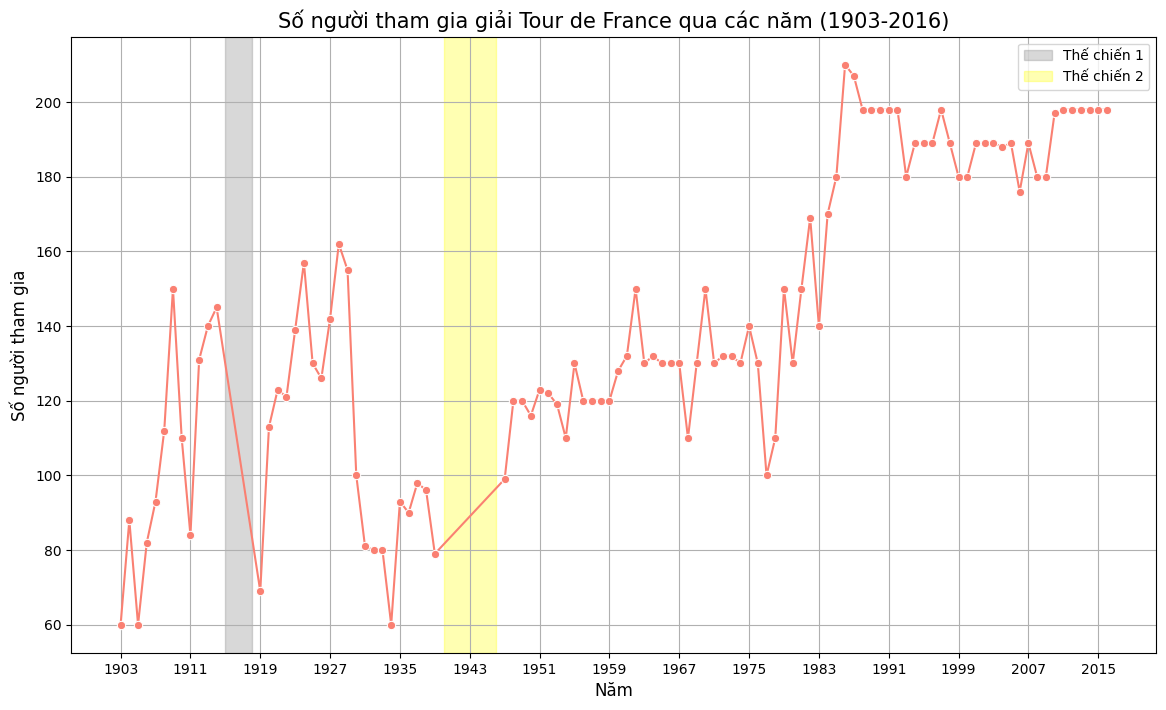

In [ ]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=data, x='Year', y='Entrants', marker='o', color='salmon')

plt.title("Số người tham gia giải Tour de France qua các năm (1903-2016)", fontsize=15)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số người tham gia", fontsize=12)

plt.xticks(np.arange(1903, 2017, 8), np.arange(1903, 2017, 8))

plt.axvspan(1915, 1918, color='gray', alpha=0.3, label='Thế chiến 1')
plt.axvspan(1940, 1946, color='yellow', alpha=0.3, label='Thế chiến 2')

plt.legend()
plt.grid(True)

plt.show()

#### Nhận xét:

##### Số người tham gia giải Tour de France có xu hướng tăng dần theo thời gian, tuy nhiên cũng có sự biến động đáng kể qua các năm. Giải có số người tham gia thấp nhất là 60 tay đua và cao nhất 210 tay đua.

- Giai đoạn 1903-1930: Khi mới tổ chức số người tham gia giải còn khá thấp và biến động, trong khoảng từ 60 đến 150 người. Có thể do điều kiện kinh tế, xã hội và sự phát triển của môn thể thao đua xe đạp còn hạn chế.

- Giai đoạn 1930-1950: Sau giai đoạn đầu, số người tham gia giảm xuống đáng kể ở khoảng thời gian này. Có thể thấy rõ đây là giai đoạn có số lượng tay đua tham gia thấp nhất trong lịch sử. Qua việc số lượng vận động viên đã giảm xuống còn dưới 120 tay đua. Sự suy giảm có thể do ảnh hưởng của cuộc Đại khủng hoảng và Thế chiến thứ 2, khiến việc tổ chức và tham gia giải đấu trở nên khó khăn hơn.

- Giai đoạn 1950-1990: Đánh dấu sự phục hồi và tăng trưởng mạnh mẽ của Tour de France sau chiến tranh. Khi số người tham gia tăng dần trở lại, từ khoảng 120 tay đua vào đầu những năm 1950 đến gần 210 người vào những năm 1980. Đây là giai đoạn giải thu hút được nhiều sự quan tâm và có quy mô lớn hơn trước. Sự tăng trưởng có thể được thúc đẩy bởi sự phát triển kinh tế sau chiến tranh.

- Giai đoạn 1990-2016: Sau khi số người tham gia đạt đỉnh vào những năm 1980 thì giai đoạn này giải có sự giảm nhẹ về số vận động viên tham gia so với giai đoạn trước. Nhìn chung, số vận động viên tham gia dao động trong khoảng từ 180 đến gần 200 người. Tuy nhiên, chỉ có năm 2006 số vận động viên giảm xuống còn 176 người tham gia. Sự biến động có thể do các quy định mới về số lượng đội đua và tay đua tham gia giải.

##### Giải đua bị gián đoạn trong thời gian xảy ra 2 cuộc chiến tranh thế giới cũng dẫn đến sự giảm sút về số người tham gia ở những năm này.

##### Qua biểu đồ cho thấy sức hút và sự phát triển ngày càng mở rộng của giải Tour de France được thể hiện qua các năm. Tuy có những biến động trong lịch sử như chiến tranh và các yếu tố ảnh hưởng khác nhưng số vận động viên tham gia giải vẫn có xu hướng tăng dần theo thời gian. Phản ánh mức độ quan tâm của khán giả đối với Tour de France và sự phát triển của môn thể thao đua xe đạp.

### 2.6 Số người hoàn thành giải Tour de France qua các năm

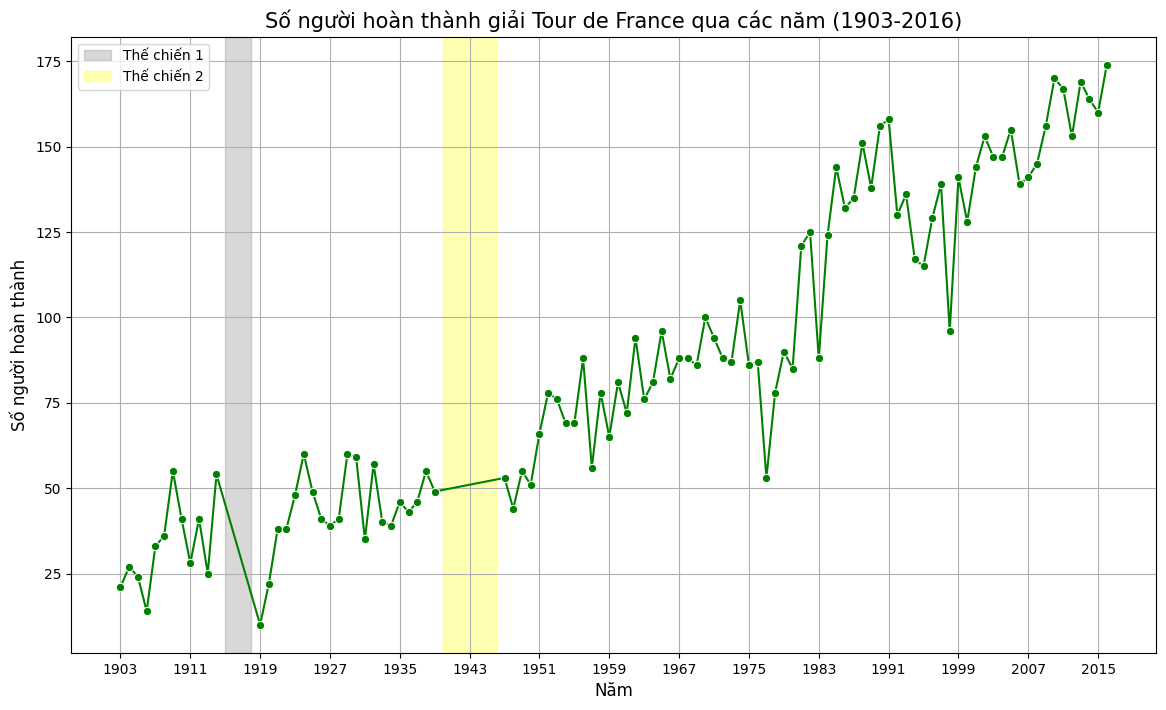

In [ ]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=data, x='Year', y='Finishers', marker='o', color='green')

plt.title("Số người hoàn thành giải Tour de France qua các năm (1903-2016)", fontsize=15)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số người hoàn thành", fontsize=12)

plt.xticks(np.arange(1903, 2017, 8), np.arange(1903, 2017, 8))

plt.axvspan(1915, 1918, color='gray', alpha=0.3, label='Thế chiến 1')
plt.axvspan(1940, 1946, color='yellow', alpha=0.3, label='Thế chiến 2')

plt.legend()
plt.grid(True)

plt.show()

#### Nhận xét:

##### Có thể thấy số người hoàn thành giải Tour de France có xu hướng tăng dần theo thời gian, tuy nhiên vẫn có sự biến động qua các năm. Khi giải có số người hoàn thành thấp nhất là 10 tay đua vào năm 1919 và ghi nhận số vận động viên về đích nhiều nhất 174 tay đua ở 2016.

- Giai đoạn 1903-1930: Khi mới tổ chức số người hoàn thành giải còn khá thấp và có nhiều biến động, trong khoảng từ 10 đến 60 tay đua. Có thể do điều kiện kinh tế, xã hội còn hạn chế.

- Giai đoạn 1930-1950: Ở giai đoạn này không có sự chuyển biến rõ rệt nào về số người hoàn thành giải. Khi ghi nhận số vận động viên hoàn thành giải ở trong khoảng từ 35 đến gần 60 người. Phản ánh ảnh hưởng của cuộc Đại khủng hoảng và Thế chiến thứ 2.

- Giai đoạn 1950-1990: Giai đoạn này cho thấy sự phục hồi và tăng trưởng mạnh mẽ của Tour de France sau chiến tranh. Số người hoàn thành giải đã tăng dần trở lại, từ khoảng hơn 60 tay đua vào đầu những năm 1950 đến gần 150 người vào cuối những năm 1980.

- Giai đoạn 1990-2016: Vào thập niên 1990 nhận thấy số vận động viên hoàn thành có sự giảm nhẹ và nhiều biến động trong khoảng từ 96 đến gần 160 tay đua. Sang đến đầu những năm 2000, số người hoàn thành có xu hướng tăng trở lại nhưng không ổn định ở mức từ 128 đến khoảng 170 người và ghi nhận cao nhất 174 vận động viên hoàn thành.

##### Giải đua bị gián đoạn trong thời gian xảy ra 2 cuộc chiến tranh thế giới cũng dẫn đến sự giảm sút về số người hoàn thành ở những năm này.

##### Biểu đồ thể hiện những biến động trong lịch sử của Tour de France nhưng số vận động viên hoàn thành giải vẫn có xu hướng tăng dần theo thời gian. Tuy không ổn định và một số năm ghi nhận mức giảm đáng kể số lượng tay đua hoàn thành giải. Trong những năm gần đây, xác lập các kỉ lục mới về số người hoàn thành giải cho thấy Tour de France đang không ngừng phát triển và mở rộng.

### 2.7 Số lần chiến thắng của các tay đua qua các năm

<ipython-input-82-5cab3ce0a276>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_counts, x='Winner', y='Wins', palette=colors, edgecolor='black')


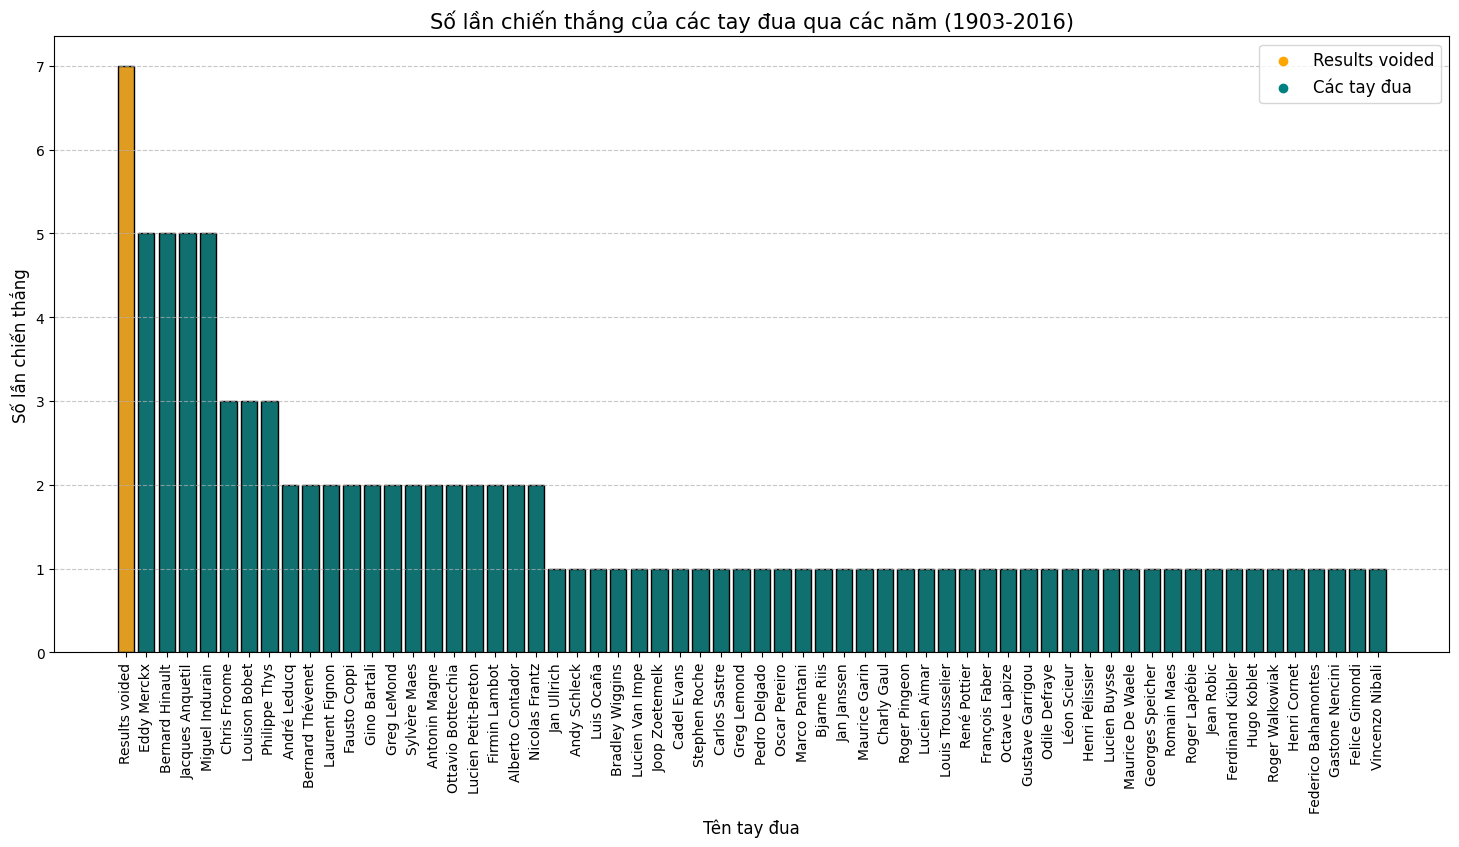

In [ ]:
# Chuẩn hóa dữ liệu
data['Winner'] = data['Winner'].str.strip()

win_counts = data['Winner'].value_counts().reset_index()
win_counts.columns = ['Winner', 'Wins']

colors = ['orange' if rider == "Results voided" else 'teal' for rider in win_counts['Winner']]

plt.figure(figsize=(18, 8))

sns.barplot(data=win_counts, x='Winner', y='Wins', palette=colors, edgecolor='black')

plt.scatter([], [], color='orange', label="Results voided")
plt.scatter([], [], color='teal', label="Các tay đua")
plt.legend(loc='upper right', fontsize=12)

plt.title('Số lần chiến thắng của các tay đua qua các năm (1903-2016)', fontsize=15)
plt.xlabel('Tên tay đua', fontsize=12)
plt.ylabel('Số lần chiến thắng', fontsize=12)

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Nhận xét:

##### Nhìn chung, biểu đồ cho thấy sự phân bố không đồng đều về số lần chiến thắng của các tay đua trong giải Tour de France. Khi đa số các tay đua chỉ giành chiến thắng 1 lần và có một số ít những cái tên nổi bật với số lần chiến thắng Tour de France nhiều hơn.

##### Có 4 tay đua cùng giành được nhiều lần chiến thắng nhất đó là Eddy Merckx, Bernard Hinault, Jacques Anquetil và Miguel Indurain khi cùng có 5 lần đăng quang ở Tour de France. Thể hiện thành tích vượt trội và nổi bật của họ trong lịch sử giải đua.

##### Còn phần lớn các tay đua chỉ giành được 1 lần chiến thắng duy nhất. Phản ánh tính cạnh tranh cao và những thử thách của giải.

##### Ngoài ra, ở cột cao nhất là thành tích của người từng chiến thắng nhiều nhất giải Tour de France với 7 lần chiến thắng liên tiếp từ năm 1999 đến 2005 nhưng đã bị tước bỏ toàn bộ danh hiệu vì sử dụng doping để thi đấu.

##### Qua đó, biểu đồ Số lần chiến thắng của các tay đua qua các năm từ 1903 đến 2016 thể hiện sự cạnh tranh và những khó khăn để giành chiến thắng trong giải Tour de France. Khi phần lớn các tay đua chỉ có 1 lần được xứng tên ở vị trí đầu tiên. Tuy nhiên, vẫn có một số cá nhân nổi bật đã giành được chiến thắng nhiều lần và 4 tay đua cùng có được số lần đăng quang nhiều nhất Tour de France với 5 lần.

### 2.8 Phân phối quốc tịch của người chiến thắng Tour de France qua các năm

<ipython-input-66-9e063654c311>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Winner's Nationality", data=data, order=order, palette=colors)


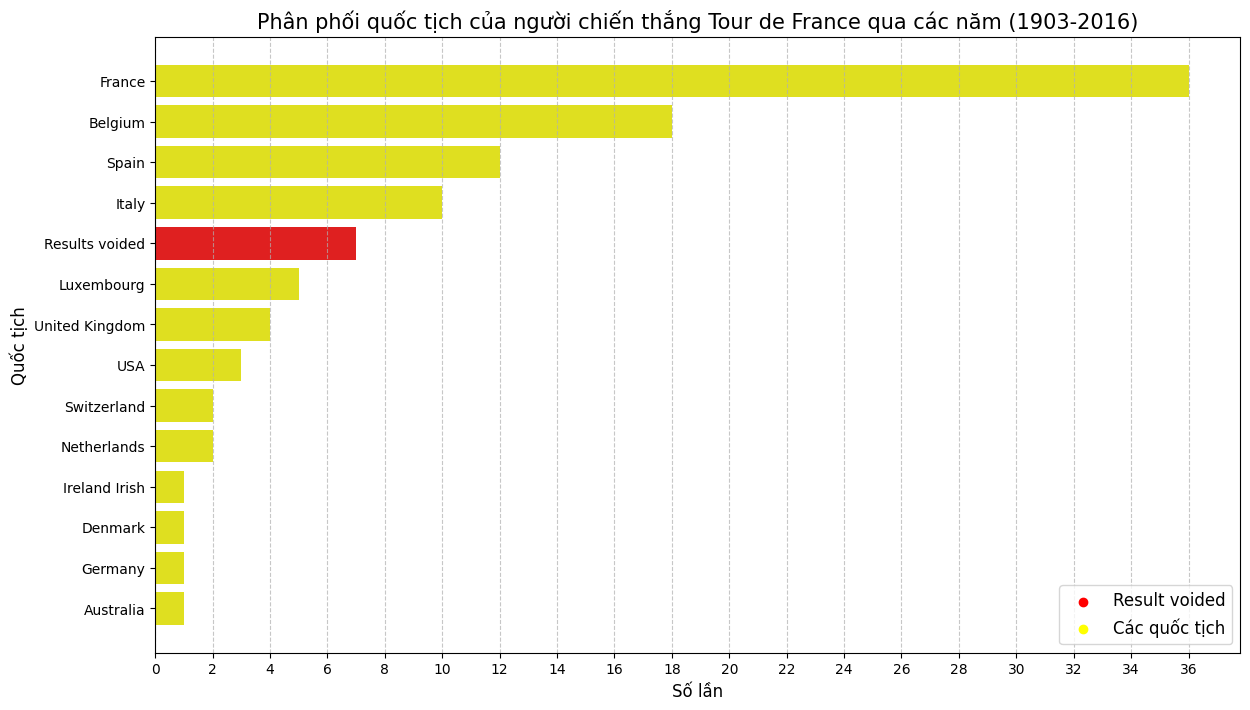

In [ ]:
plt.figure(figsize=(14, 8))

order = data["Winner's Nationality"].value_counts().index
colors = ['red' if nationality == 'Results voided' else 'yellow' for nationality in order]

sns.countplot(y="Winner's Nationality", data=data, order=order, palette=colors)

plt.title("Phân phối quốc tịch của người chiến thắng Tour de France qua các năm (1903-2016)", fontsize=15)
plt.xlabel('Số lần', fontsize=12)
plt.ylabel('Quốc tịch', fontsize=12)

plt.xticks(np.arange(0, 40, 2), np.arange(0, 40, 2))

plt.scatter([], [], color='red', label="Result voided")
plt.scatter([], [], color='yellow', label="Các quốc tịch")
plt.legend(loc='lower right', fontsize=12)

plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

plt.show()

#### Nhận xét:

##### Từ biểu đồ có thể thấy được Pháp là quốc gia chiếm ưu thế nhất với số lần có vận động viên chiến thắng áp đảo là 36 lần. Thể hiện sự thống trị của các tay đua đến từ Pháp trong lịch sử Tour de France.

##### Tiếp theo, Bỉ và Tây Ban Nha lần lượt đứng thứ 2 và 3 về số lần có tay đua giành được chiến thắng của giải.

##### Còn các quốc gia khác như Ý, Luxembourg, Anh, Mỹ,... có số lần vận động viên được vinh danh chiến thắng ít hơn. Phản ánh sự cạnh tranh của giải đến từ nhiều quốc gia trên toàn thế giới.

##### Mặc dù Pháp là quốc gia chiếm ưu thế lớn nhất về số vận động viên chiến thắng Tour de France nhưng biểu đồ vẫn cho thấy sự đa dạng về quốc tịch của các tay đua, khi xuất hiện nhiều quốc gia khác nhau.

##### Ngoài ra, cũng cho biết ban tổ chức Tour de France đã từng hủy bỏ danh hiệu chiến thắng 7 năm liên tiếp từ 1999 đến 2005 vì tay đua chiến thắng đã vi phạm quy định khi sử dụng doping để thi đấu.

##### Qua đó, thấy rằng giải Tour de France đã thu hút sự tham gia của nhiều tay đua đến từ các quốc gia trên thế giới. Trong lịch sử của giải từ 1903 đến 2016, Pháp là quốc gia đạt được thành tích tốt nhất với số lần có vận động viên chiến thắng là 36, theo sau đó là Bỉ và Tây Ban Nha. Điều này, thể hiện Tour de France ngày càng cạnh tranh hơn với sự tham gia của các tay đua đến từ nhiều quốc gia khác nhau trên thế giới.



### 2.9 Số lần chiến thắng của các đội đua giải Tour de France qua các năm

<ipython-input-68-f5bcdcc15651>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_wins, x='Team', y='Wins', palette=colors, edgecolor='black')


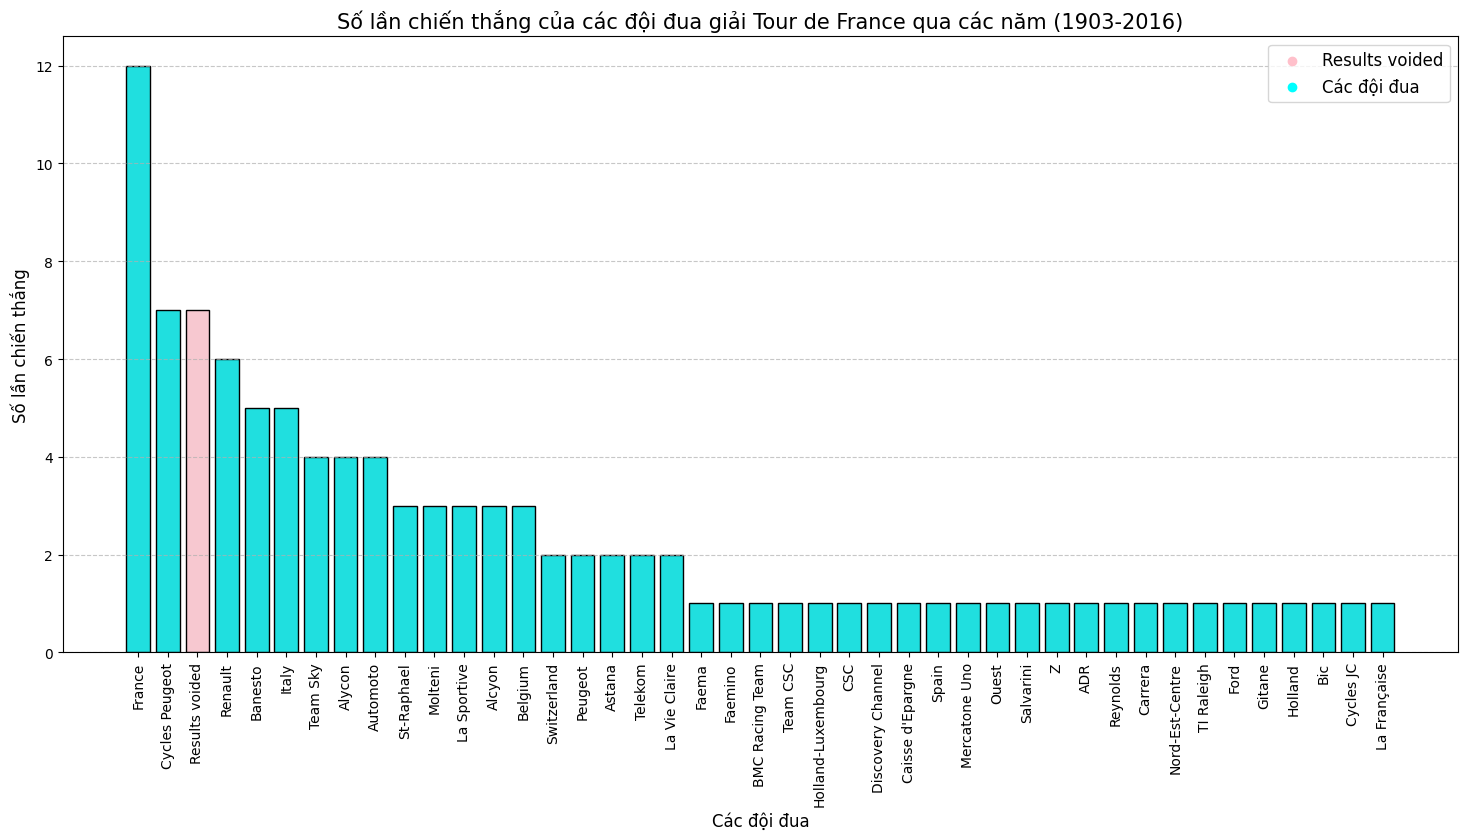

In [ ]:
data["Winner's Team"] = data["Winner's Team"].str.strip()

team_wins = data["Winner's Team"].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

colors = ['pink' if team == "Results voided" else 'cyan' for team in team_wins["Team"]]

plt.figure(figsize=(18, 8))

sns.barplot(data=team_wins, x='Team', y='Wins', palette=colors, edgecolor='black')

plt.scatter([], [], color='pink', label="Results voided")
plt.scatter([], [], color='cyan', label="Các đội đua")
plt.legend(loc='upper right', fontsize=12)

plt.title('Số lần chiến thắng của các đội đua giải Tour de France qua các năm (1903-2016)', fontsize=15)
plt.xlabel('Các đội đua', fontsize=12)
plt.ylabel('Số lần chiến thắng', fontsize=12)

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Nhận xét:

##### Thấy rằng biểu đồ có sự phân bố không đồng đều về thành tích chiến thắng của các đội đua ở giải Tour de France từ năm 1903 đến 2016. Nổi bật là một số đội đua với số lần đăng quang chiếm tỉ lệ áp đảo, trong khi phần lớn các đội khác có chỉ số lần chiến thắng hạn chế.

##### Đồng thời cũng có một vài người chiến thắng không đến từ một đội đua cụ thể nào nên được thể hiện là quốc tịch của họ. Trong biểu đồ có Pháp là quốc gia có số đội đua đã từng giành được nhiều vinh quang nhất của giải Tour de France.

##### Trong lịch sử Tour de France, "Results voided" ở biểu đồ ám chỉ đến chiến thắng của Lance Armstrong và đội US Postal Service từ năm 1999 đến 2005, khi đã từng đăng quang trong 7 lần liên tiếp. Tuy nhiên, sau đó đã bị hủy kết quả và tước bỏ tất cả các danh hiệu của giải Tour de France do sử dụng doping trong thi đấu.

##### Các đội đua khác như Cycles Peugeot, Renault, Banesto,... cũng được ghi nhận với số lần chiến thắng đáng kể. Còn phần lớn các đội đua khác có số lần chiến thắng rất ít hoặc chỉ 1 lần được vinh danh duy nhất.

##### Từ đó, biểu đồ thể hiện Số lần chiến thắng của các đội đua qua các năm từ 1903 đến 2016 cho thấy tính cạnh tranh khi phần lớn các đội có thành tích khá khiêm tốn và một vài đội nổi bật khác cũng có được những thành tích đáng kể. Ngoài ra, US Postal Service từng là đội đua thống trị giải nhưng đã bị hủy kết quả do sử dụng doping. Phản ánh Tour de France là giải đua xe đạp đầy thử thách và cần sự nỗ lực không ngừng từ phía các đội đua để giành được chiến thắng.

### 2.10 Phân bố thời gian bắt đầu giải theo tháng qua các năm

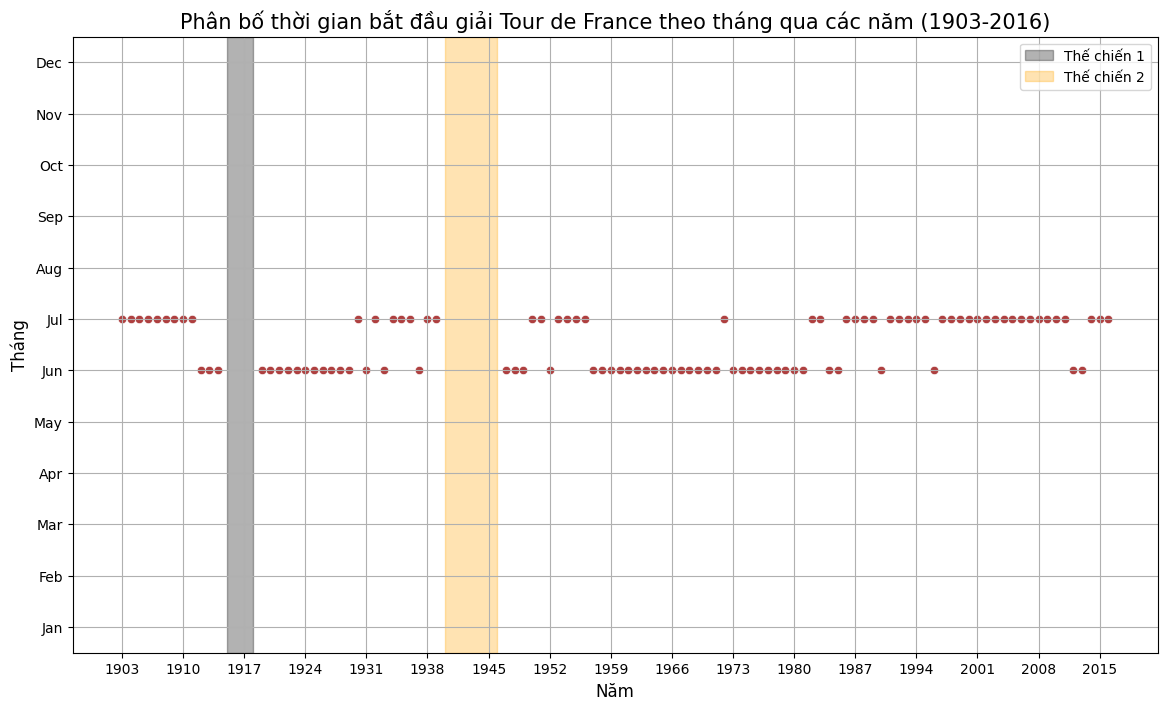

In [ ]:
plt.figure(figsize=(14, 8))

data['Start Month'] = pd.to_datetime(data['Start Date']).dt.month
sns.scatterplot(data=data, x='Year', y='Start Month', color='brown', alpha=0.9)

plt.title("Phân bố thời gian bắt đầu giải Tour de France theo tháng qua các năm (1903-2016)", fontsize=15)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Tháng", fontsize=12)

plt.xticks(np.arange(1903, 2017, 7), np.arange(1903, 2017, 7))
plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylim(0.5, 12.5)

plt.axvspan(1915, 1918, color='black', alpha=0.3, label='Thế chiến 1')
plt.axvspan(1940, 1946, color='orange', alpha=0.3, label='Thế chiến 2')

plt.legend()
plt.grid(True)

plt.show()

#### Nhận xét:

##### Hằng năm, giải đua Tour de France thường được tổ chức vào mùa hè, chủ yếu là trong khoảng tháng 6 và 7.

- Giai đoạn 1903-1930: Ở những năm đầu mới tổ chức, giải thường bắt đầu vào tháng 7 hằng năm nhưng sau đó có sự biến động khi được tổ chức sớm hơn vào tháng 6.

- Giai đoạn 1930-1980: Thời gian này vẫn có sự biến động trong khoảng tháng 6 và 7. Nhưng có thể thấy tháng 6 trong giai đoạn này được chọn để bắt đầu giải Tour de France hằng năm là chủ yếu.

- Giai đoạn 1980-2016: Khoảng thời gian được chọn vẫn trong tháng 6 và 7. Tuy nhiên, có sự thay đổi so với giai đoạn 1930-1980, khi tháng 7 được ban tổ chức chọn để bắt đầu giải thường xuyên nhất ở giai đoạn này.

##### Tour de France đã từng bị gián đoạn trong giai đoạn Thế chiến thứ nhất (1915-1918) và Thế chiến thứ hai (1940-1946), khiến giải phải hủy bỏ tổ chức ở thời gian này.

##### Qua biểu đồ, giải Tour de France cho thấy sự ổn định khi thường được diễn ra vào mùa hè hằng năm từ 1903 đến 2016. Tuy vẫn có một số biến động nhỏ ở thời gian bắt đầu giải theo tháng qua các năm trong khoảng tháng 6 và 7. Thể hiện có thể liên quan đến điều kiện thời tiết thuận lợi cho việc đua xe đạp trong thời gian mùa hè. Các sự kiện lịch sử như chiến tranh cũng ảnh hưởng đến việc tổ chức giải đua.

### 2.11 Phân bố thời gian kết thúc giải theo tháng qua các năm

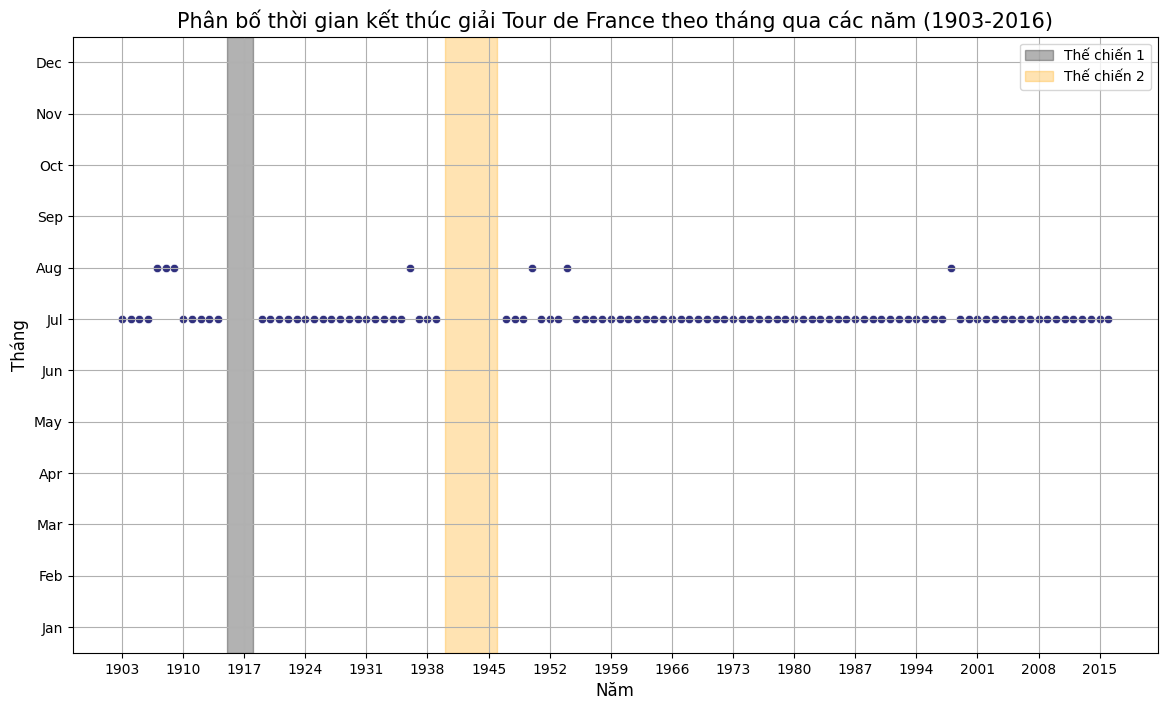

In [ ]:
plt.figure(figsize=(14, 8))

data['End Month'] = pd.to_datetime(data['End Date']).dt.month
sns.scatterplot(data=data, x='Year', y='End Month', color='midnightblue', alpha=0.9)

plt.title("Phân bố thời gian kết thúc giải Tour de France theo tháng qua các năm (1903-2016)", fontsize=15)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Tháng", fontsize=12)

plt.xticks(np.arange(1903, 2017, 7), np.arange(1903, 2017, 7))
plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylim(0.5, 12.5)

plt.axvspan(1915, 1918, color='black', alpha=0.3, label='Thế chiến 1')
plt.axvspan(1940, 1946, color='orange', alpha=0.3, label='Thế chiến 2')

plt.legend()
plt.grid(True)

plt.show()

#### Nhận xét:

##### Giải Tour de France thường được kết thúc vào mùa hè hằng năm, chủ yếu là trong tháng 7 và 8.

- Giai đoạn 1903-1930: Trong giai đoạn này, giải được kết thúc thường vào tháng 7 và 8. Nhưng có thể thấy phần lớn là kết thúc giải đua vào tháng 7.

- Giai đoạn 1930-1980: Khoảng thời gian này có sự biến động nhỏ giữa tháng 7 và 8. Tuy nhiên, tháng 7 vẫn được ban tổ chức chọn để kết thúc giải Tour de France là chủ yếu.

- Giai đoạn 1980-2016: Nhìn chung không có sự thay đổi nhiều khi tháng 7 đa số được chọn để kết thúc giải Tour de France hằng năm và giữ sự ổn định liên tục suốt nhiều năm liền.

##### Trong lịch sử, Tour de France đã từng phải hủy tổ chức ở 2 thời điểm là Thế chiến thứ nhất (1915-1918) và Thế chiến thứ hai (1940-1946).

##### Từ đó, cho thấy giải Tour de France từ 1903 đến 2016 giữ sự ổn định khi thường kết thúc giải vào mùa hè, trong khoảng tháng 7 và 8 hằng năm. Tuy cũng có một số biến động nhỏ và phần lớn thời gian kết thúc giải chủ yếu là trong tháng 7.

### 2.12 Các thành phố được chọn làm điểm xuất phát của Tour de France qua các năm

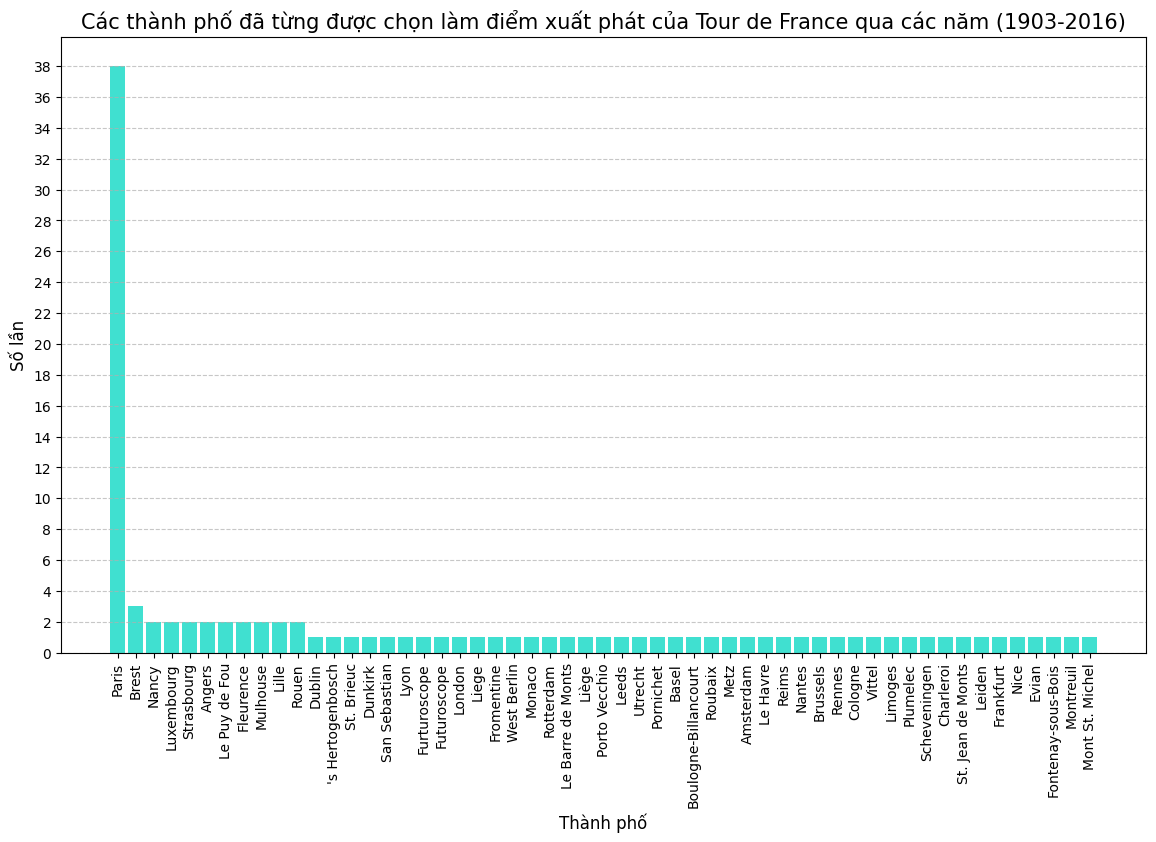

In [ ]:
starting_city_counts = data['Starting city'].value_counts()

plt.figure(figsize=(14, 8))

plt.bar(starting_city_counts.index, starting_city_counts.values, color='turquoise')

plt.title('Các thành phố đã từng được chọn làm điểm xuất phát của Tour de France qua các năm (1903-2016)', fontsize=15)
plt.ylabel('Số lần', fontsize=12)
plt.xlabel('Thành phố', fontsize=12)

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 40, 2))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Nhận xét:

##### Từ biểu đồ cho thấy sự phân bố không đồng đều giữa các thành phố được chọn làm điểm xuất phát của Tour de France. Khi Paris là thành phố được chọn làm điểm xuất phát nhiều nhất nhưng phần lớn các thành phố khác lại chỉ được chọn một hoặc một vài lần.

##### Trong đó, số lần Paris được chọn làm điểm xuất phát chiếm tỉ lệ áp đảo với 38 lần. Các thành phố khác như Brest, Nancy, Luxembourg,... cũng chỉ có 2 lần trở lên được chọn làm điểm xuất phát của giải.

##### Qua đó, biểu đồ thể hiện các thành phố đã từng được chọn làm điểm xuất phát cho giải Tour de France qua các năm từ 1903 đến 2016. Cho thấy Paris có một vai trò quan trọng đối với Tour de France khi thường xuyên được chọn làm điểm xuất phát của giải. Ngoài ra, giải đua cũng lựa chọn các địa điểm xuất phát đa dạng khác, trải rộng trên khắp nước Pháp và những quốc gia lân cận.

### 2.13 Tọa độ địa lý các thành phố xuất phát của Tour de France qua các năm

In [ ]:
# Tạo bản đồ
map_start_city = folium.Map(location=[data['Starting city Latitude'].mean(),
                                     data['Starting city Longitude'].mean()],
                           zoom_start=5)

title_start_city = '''
             <h3 align="center" style="font-size:18px"><b>Vị trí các thành phố xuất phát của Tour de France qua các năm
             (1903-2016) dựa trên kinh độ và vĩ độ</b></h3>
             '''
map_start_city.get_root().html.add_child(folium.Element(title_start_city))

for index, row in data.iterrows():
    folium.Marker(
        location=[row['Starting city Latitude'], row['Starting city Longitude']],
        popup=row['Starting city'],
        icon=folium.Icon(color="blue", icon="bicycle", prefix='fa')
    ).add_to(map_start_city)

map_start_city

#### Nhận xét:

##### Nhìn chung, các thành phố được chọn làm điểm xuất phát của Tour de France qua các năm tập trung chủ yếu ở khu vực Tây Âu, đặc biệt là Pháp.

##### Khi các thành phố xuất phát được phân bố rộng khắp trên nước Pháp, từ các vùng ven biển đến những khu vực nội địa và trải dài từ miền Bắc xuống phía Nam. Điều này, giúp giải đua được mở rộng đến nhiều địa phương khác nhau tạo nên sự đa dạng và thu hút nhiều khán giả hơn.

##### Ngoài ra, bên cạnh Pháp thì một số thành phố được chọn xuất phát khác cũng nằm ở những nước lân cận như Bỉ, Hà Lan, Luxembourg,... Việc lựa chọn các thành phố xuất phát ở nước ngoài giúp mở rộng quy mô và tầm ảnh hưởng của Tour de France đến khán giả quốc tế.

### 2.14 Các quốc gia được chọn làm điểm xuất phát của Tour de France qua các năm

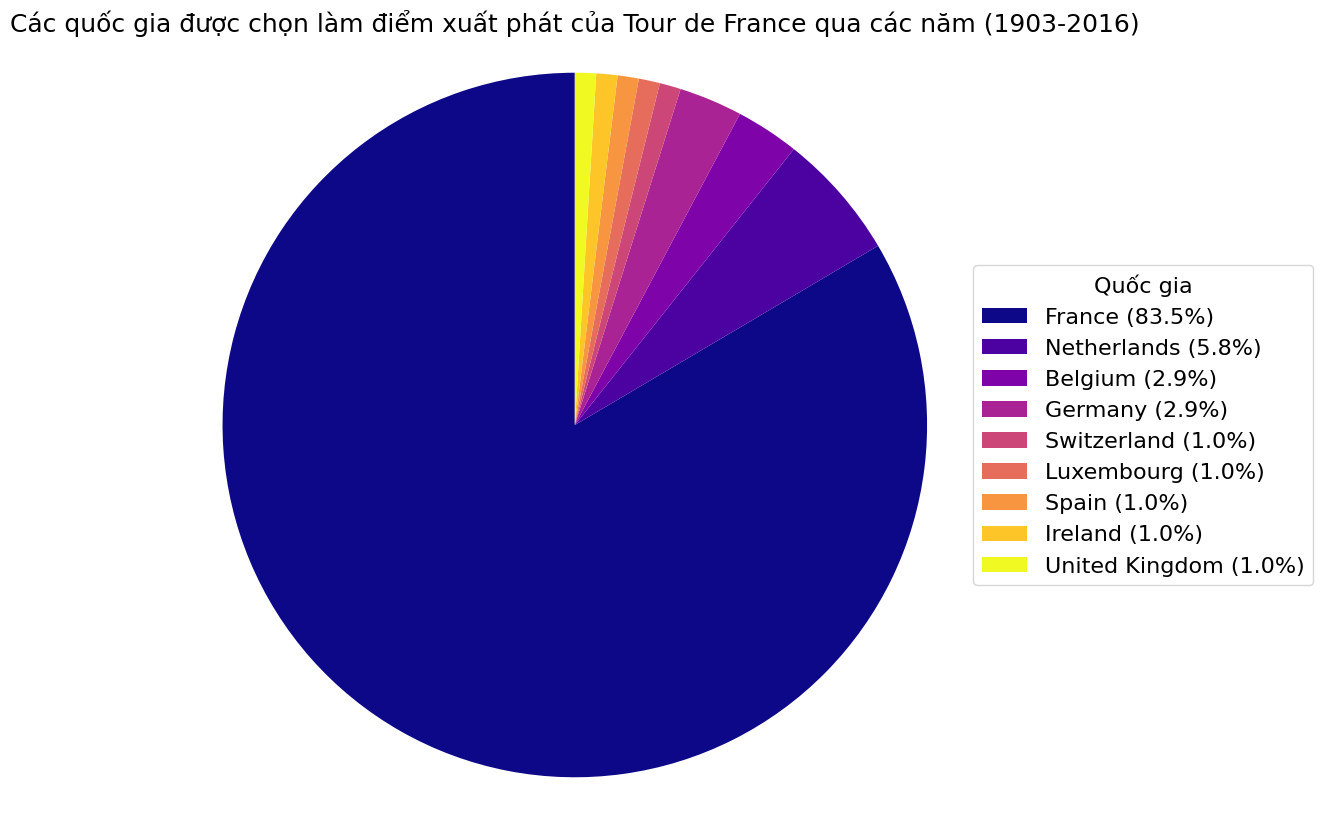

In [ ]:
starting_country_counts = data['Starting country'].value_counts()

countries = starting_country_counts.index
counts = starting_country_counts.values

colors = plt.cm.plasma(np.linspace(0, 1, len(countries)))

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(counts, labels=None, autopct='', startangle=90, colors=colors)

labels = ['{} ({:.1f}%)'.format(country, percentage) for country, percentage in zip(countries, counts / np.sum(counts) * 100)]

plt.legend(wedges, labels, title="Quốc gia", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=16, title_fontsize=16)

plt.title('Các quốc gia được chọn làm điểm xuất phát của Tour de France qua các năm (1903-2016)', fontsize=18)
plt.axis('equal')

plt.show()

#### Nhận xét:

##### Thấy rằng, Pháp là quốc gia được chọn làm điểm xuất phát của Tour de France nhiều nhất với tỷ lệ áp đảo gần 84%. Phù hợp với bản chất của Tour de France khi vốn được tổ chức tại Pháp.

##### Đồng thời, các quốc gia khác chỉ chiếm một phần nhỏ trong tổng số lần xuất phát của Tour de France. Trong đó, Hà Lan chiếm khoảng 5.8%, có 2 quốc gia cùng chiếm 2.9% đó là Bỉ và Đức.

##### Mặc dù Tour de France đã từng xuất phát ở một số quốc gia khác ngoài Pháp nhưng sự đa dạng về quốc gia xuất phát của giải vẫn còn hạn chế. Phần lớn các lần xuất phát vẫn tập trung ở Pháp.

##### Từ biểu đồ trong khoảng thời gian 1903-2016, Pháp là quốc gia được lựa chọn xuất phát chủ yếu của Tour de France. Tuy có sự xuất hiện của những quốc gia lân cận khác nhưng tỉ lệ vẫn còn khá thấp. Phản ánh bản chất, lịch sử của giải, đồng thời cho thấy tiềm năng phát triển và mở rộng quy mô quốc tế cho Tour de France.

### 2.15 Địa điểm thành phố kết thúc của Tour de France qua các năm

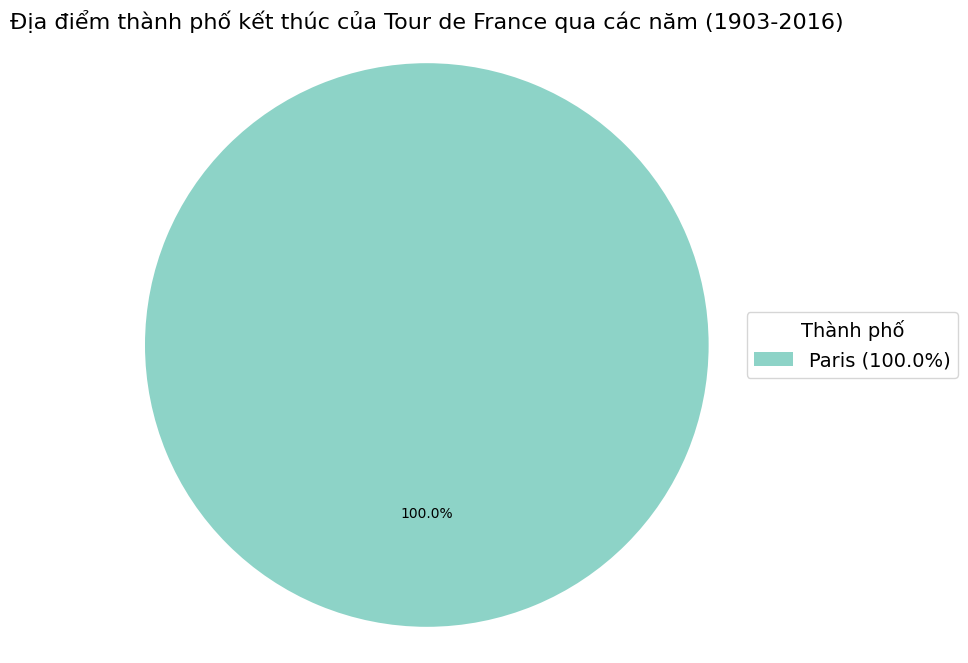

In [ ]:
finishing_city_counts = data['Finishing city'].value_counts()

cities = finishing_city_counts.index
counts = finishing_city_counts.values

colors = plt.cm.Set3(np.linspace(0, 1, len(cities)))

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors,
                                  textprops={'fontsize': 10})

labels = ['{} ({:.1f}%)'.format(city, percentage) for city, percentage in zip(cities, counts / np.sum(counts) * 100)]

plt.legend(wedges, labels, title="Thành phố", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=14, title_fontsize=14)

plt.title('Địa điểm thành phố kết thúc của Tour de France qua các năm (1903-2016)', fontsize=16)

plt.axis('equal')
plt.show()

#### Nhận xét:

##### Qua biểu đồ về thành phố được lựa chọn làm địa điểm kết thúc của giải Tour de France từ năm 1903 đến 2016 cho thấy Paris chiếm tỉ lệ tuyệt đối và không có sự xuất hiện của thêm bất kì một thành phố nào khác.

##### Từ đó, thể hiện sự nhất quán của Tour de France khi Paris là thành phố duy nhất được lựa chọn làm điểm kết thúc của giải. Phản ánh Tour de France là giải đua xe đạp của Pháp với Paris là thủ đô, trung tâm văn hóa và lịch sử của đất nước này. Việc kết thúc giải đua tại Paris hằng năm mang ý nghĩa biểu tượng lớn và góp phần tăng thêm sức hút cũng như tầm ảnh hưởng của Tour de France trên toàn thế giới.

### 2.16 Tọa độ địa lý cho thành phố kết thúc của Tour de France qua các năm

In [ ]:
map_finish_city = folium.Map(location=[data['Finishing city Latitude'].mean(),
                                      data['Finishing city Longitude'].mean()],
                            zoom_start=5)

title_finish_city = '''
             <h3 align="center" style="font-size:18px"><b>Vị trí thành phố kết thúc của Tour de France qua các năm
             (1903-2016) dựa trên kinh độ và vĩ độ</b></h3>
             '''
map_finish_city.get_root().html.add_child(folium.Element(title_finish_city))

for index, row in data.iterrows():
    folium.Marker(
        location=[row['Finishing city Latitude'], row['Finishing city Longitude']],
        popup=row['Finishing city'],
        icon=folium.Icon(color="red", icon="flag-checkered", prefix='fa')
    ).add_to(map_finish_city)

map_finish_city

#### Nhận xét:

##### Vị trí thành phố kết thúc của Tour de France từ năm 1903 đến 2016 cho thấy thủ đô Paris của nước Pháp là điểm đến quen thuộc và duy nhất cho chặng đua cuối cùng của giải.

##### Điều này đã phản ánh tính nhất quán và truyền thống của ban tổ chức Tour de France. Khi luôn chọn Paris, một nơi có nhiều địa điểm mang tính biểu tượng và ý nghĩa để tổ chức cho sự kiện kết thúc giải đua xe đạp hoành tráng.

## 3. So sánh các thông tin dữ liệu

### 3.1 Tốc độ trung bình của người chiến thắng và tổng quãng đường đua của giải

### 3.2 Số vận động viên tham gia và hoàn thành giải Tour de France qua các năm

### 3.3 Tổng quãng đường và số chặng đua của giải Tour de France qua các năm

### 3.4 Tốc độ trung bình của người thắng và số chặng đua

### 3.5 Tổng quãng đường đua và số vận động viên hoàn thành giải qua các năm

### 3.6 Số chặng đua và các vận động viên hoàn thành giải qua các năm

### 3.7 Mối quan hệ giữa quốc tịch của người chiến thắng và đội đua vô địch

## 4. Biểu đồ tổng quan cho dữ liệu của Tour De France

## 5. Kết luận